<a href="https://colab.research.google.com/github/hyukstory/hyukstory_AI/blob/main/0-4.%20Pulsar_Star_%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import numpy as np # library for array management

# 1.데이터 불러오기

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/dataset/pulsar_stars.csv')

# 2.데이터 확인

In [ ]:
# 데이터 확인
data.info()

## 17898개의 행, 9개의 열 확인
## target_class 만 int64  => float64 로 dtype 통일할 필요...?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                17898 non-null  float64
 1    Standard deviation of the integrated profile  17898 non-null  float64
 2    Excess kurtosis of the integrated profile     17898 non-null  float64
 3    Skewness of the integrated profile            17898 non-null  float64
 4    Mean of the DM-SNR curve                      17898 non-null  float64
 5    Standard deviation of the DM-SNR curve        17898 non-null  float64
 6    Excess kurtosis of the DM-SNR curve           17898 non-null  float64
 7    Skewness of the DM-SNR curve                  17898 non-null  float64
 8   target_class                                   17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


In [ ]:
# 위,아래 10개 행 확인
data.head(10)
data.tail(10) # target_class 가 0밖에 안보임

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
17888,98.726562,50.407823,0.565124,0.245231,0.570234,9.011285,22.018589,561.833787,0
17889,126.625000,55.721826,0.002946,-0.303218,0.534281,8.588882,23.913761,660.197035,0
17890,143.671875,45.302647,-0.045769,0.353643,5.173913,26.462345,5.706651,33.802613,0
17891,118.484375,50.608483,-0.029059,-0.027494,0.422241,8.086684,27.446113,830.638550,0
17892,96.000000,44.193113,0.388674,0.281344,1.871237,15.833746,9.634927,104.821623,0
17893,136.429688,59.847421,-0.187846,-0.738123,1.296823,12.166062,15.450260,285.931022,0
17894,122.554688,49.485605,0.127978,0.323061,16.409699,44.626893,2.945244,8.297092,0
17895,119.335938,59.935939,0.159363,-0.743025,21.430602,58.872000,2.499517,4.595173,0
17896,114.507812,53.902400,0.201161,-0.024789,1.946488,13.381731,10.007967,134.238910,0
17897,57.062500,85.797340,1.406391,0.089520,188.306020,64.712562,-1.597527,1.429475,0


In [ ]:
# 데이터 간단 통계 확인
data.describe()

## target_class는 0과 1로 이루어져 있다는 것을 알 수 있고
## mean값이 0.092인 것을 보아 0과 1의 비율이 1 : 0.092 인 것을 알 수 있다.
## 즉, 데이터의 9.2% 만 Pulsar Star이다

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309331,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392140,110.642211,34.539844,1191.000837,1.000000


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Target Class')

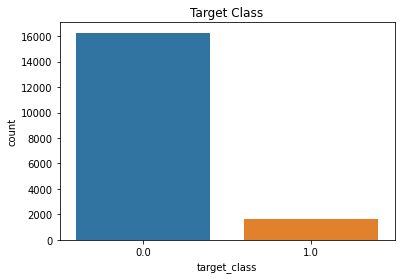

In [ ]:
# 실제로 그러한지 target_class를 시각화하여 확인
ax = sns.countplot('target_class', data = data)   
ax.set_title('Target Class')

# 3.전처리

In [ ]:
# 데이터 타입 통일
data = data.astype("float")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                17898 non-null  float64
 1    Standard deviation of the integrated profile  17898 non-null  float64
 2    Excess kurtosis of the integrated profile     17898 non-null  float64
 3    Skewness of the integrated profile            17898 non-null  float64
 4    Mean of the DM-SNR curve                      17898 non-null  float64
 5    Standard deviation of the DM-SNR curve        17898 non-null  float64
 6    Excess kurtosis of the DM-SNR curve           17898 non-null  float64
 7    Skewness of the DM-SNR curve                  17898 non-null  float64
 8   target_class                                   17898 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


# 4.시각화

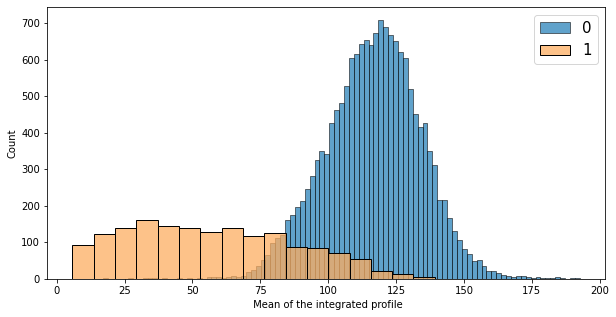

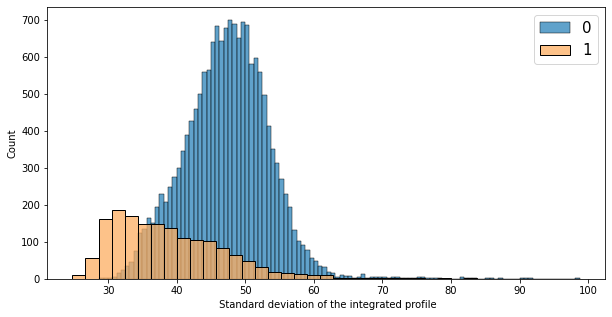

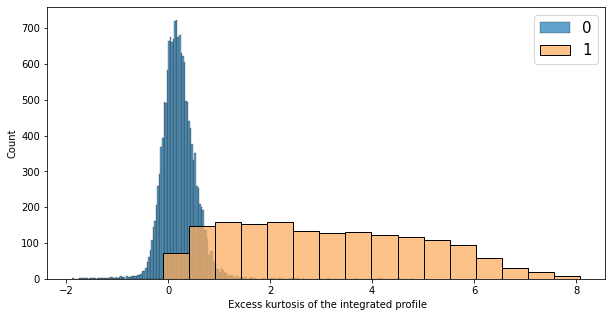

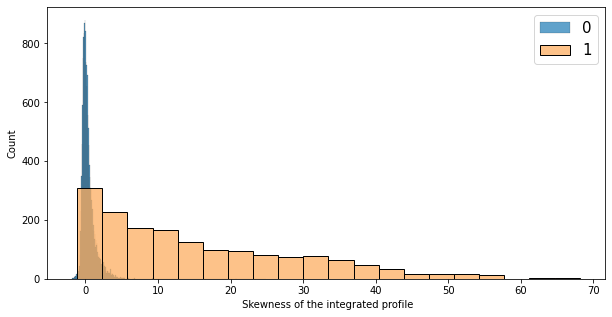

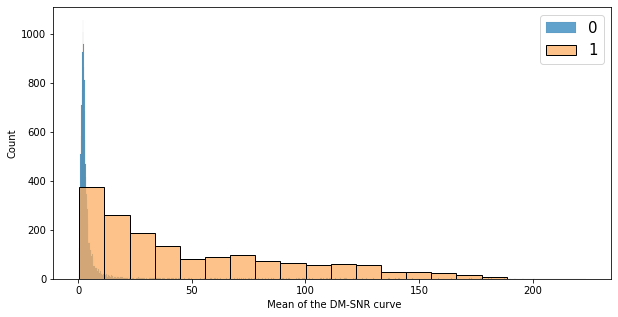

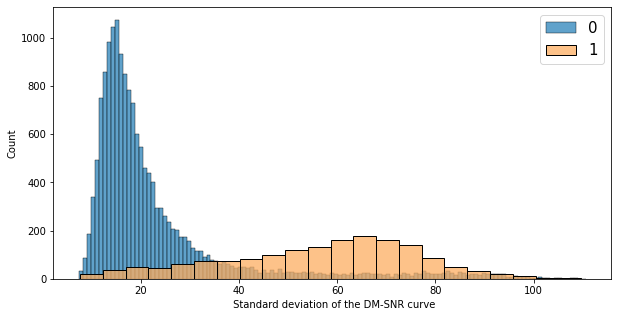

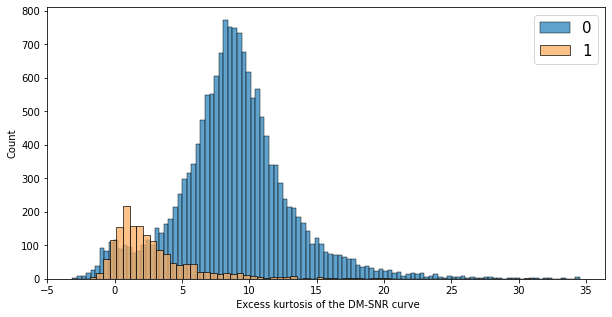

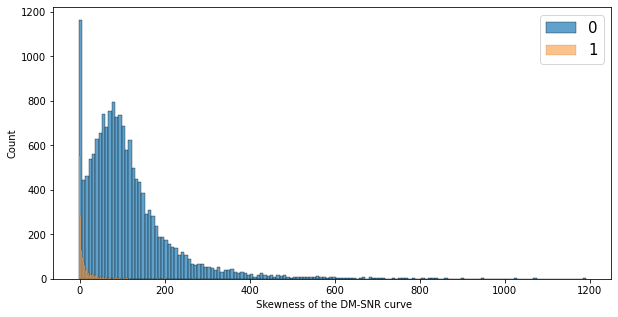

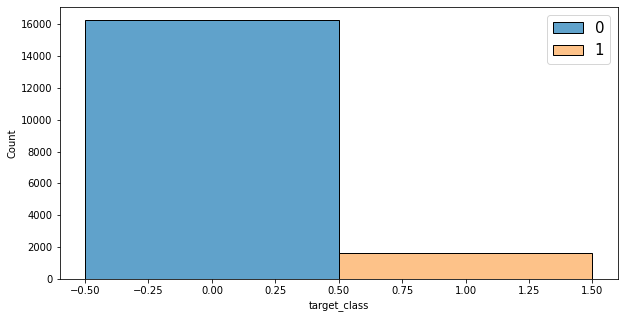

In [ ]:
# 각 변수 별 target_class의 histplot 파악
for column in data.columns :
  fig, axs = plt.subplots(figsize=(10, 5))
  
  sns.histplot(data[data['target_class']==0][column], color = "#2b83ba")   #column 별로 target_class 가 0인 값들이 나온다
  sns.histplot(data[data['target_class']==1][column], color = "#fdae61")   #column 별로 target_class 가 1인 값들이 나온다
  
  plt.legend([0, 1], loc='upper right', prop={'size': 15})
  plt.show()

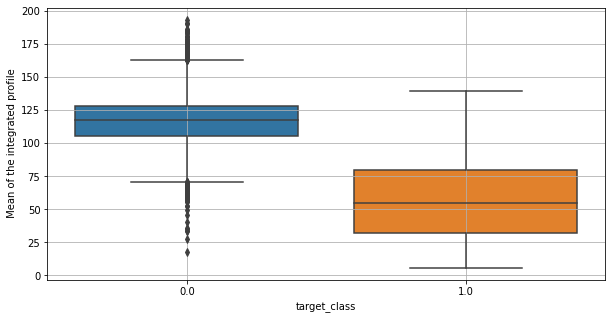

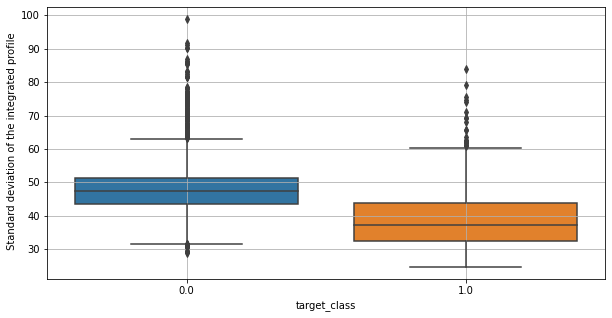

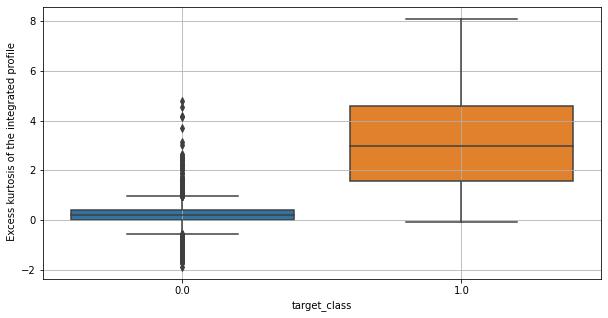

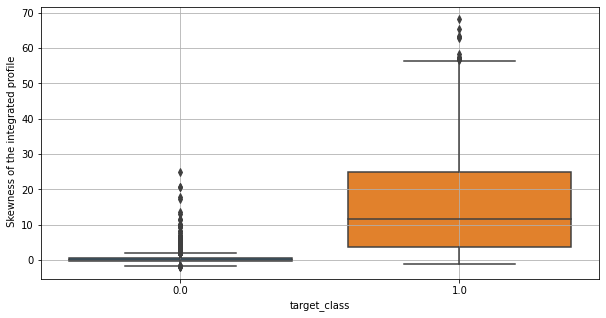

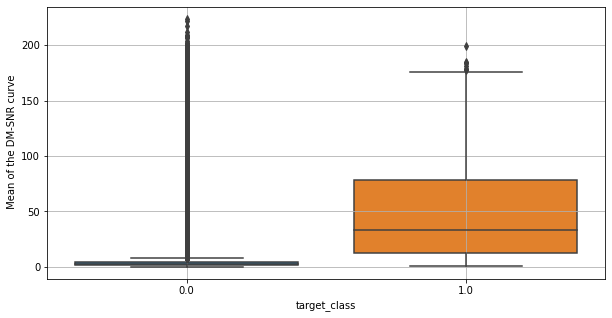

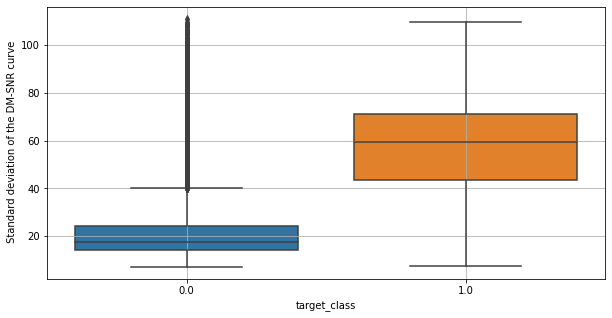

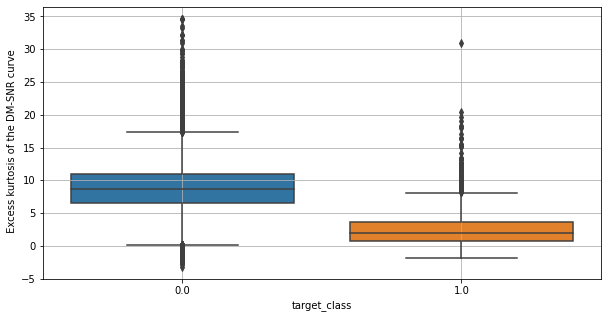

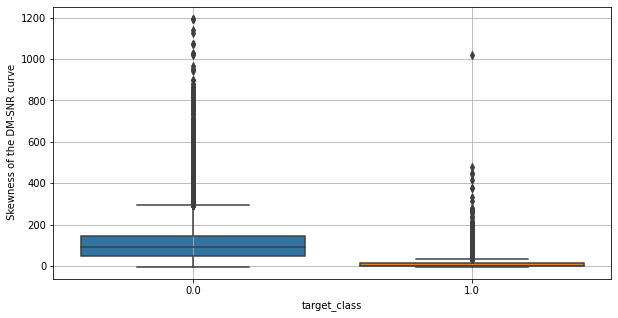

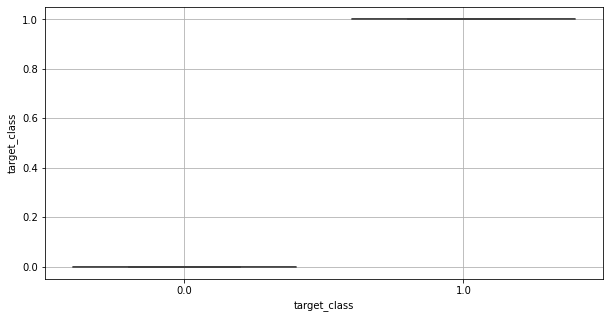

In [ ]:
# boxplot 으로 이상치 확인
for column in data.columns :
  plt.figure(figsize = (10, 5))
  sns.boxplot(x = 'target_class', y = column, data = data)
  plt.grid()
  plt.show()

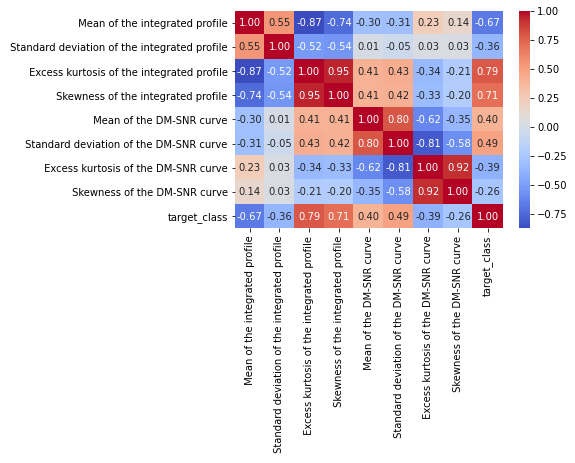

In [ ]:
# 변수가 너무 많으므로 변수 간 상관관계를 히트맵을 통해 확인하여 추리기
corr = data.corr()

sns.heatmap(data = corr, annot=True, cmap="coolwarm",fmt=".2f")

In [ ]:
# target_class 와 강한 상관관계를 띄는 변수들만 추출하기
corr_target = abs(corr["target_class"])            # 상관 계수의 절댓값이 
relevant_features = corr_target[corr_target>0.5]   # 0.5 이상인 것만 추출

relevant_features

 Mean of the integrated profile               0.673181
 Excess kurtosis of the integrated profile    0.791591
 Skewness of the integrated profile           0.709528
target_class                                  1.000000
Name: target_class, dtype: float64

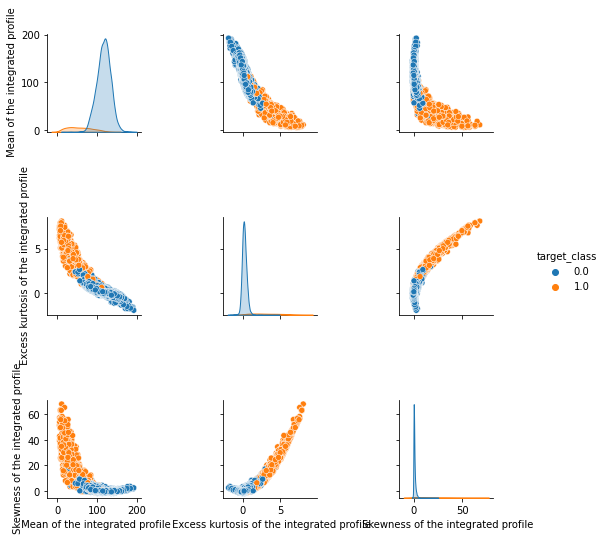

<Figure size 2880x2160 with 0 Axes>

In [ ]:
# pairplot 으로 한눈에 보기

sns.pairplot(data = data,
             hue = "target_class",
             vars = [" Mean of the integrated profile",
                     " Excess kurtosis of the integrated profile",
                     " Skewness of the integrated profile"])
plt.figure(figsize=(40,30))             
plt.suptitle("PairPlot of Relevant Features",fontsize=18)
plt.tight_layout()

# E.O.D